<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%9B%D0%B0%D0%B18_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92__4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛАБОРАТОРНА РОБОТА 8
Розробка нейронної мережі з використанням бібліотеки KERAS
ЗАВДАННЯ 1.
Побудувати звичайну багатошарову нейронну мережу для датасету fashion mnist
1. Завантажити датасет

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Роздрукувати 10 зображень.

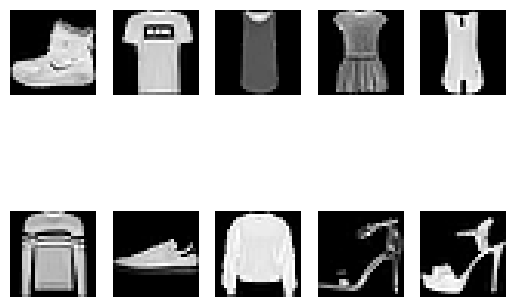

In [2]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

3. Підготовувати дані, побудувати архітектуру.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Input

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

4. Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5626 - loss: 1.2641 - val_accuracy: 0.7707 - val_loss: 0.6292 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7821 - loss: 0.5925 - val_accuracy: 0.8003 - val_loss: 0.5578 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8146 - loss: 0.5160 - val_accuracy: 0.8139 - val_loss: 0.5148 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8244 - loss: 0.4812 - val_accuracy: 0.8225 - val_loss: 0.4917 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8370 - loss: 0.4511 - val_accuracy: 0.8330 - val_loss: 0.4632 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8432 - loss: 0.4325 - val_accuracy: 0.8369 - val_loss: 0.4582 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.850

5. Вивести архітектуру моделі.

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

6. Зберегти модель на гугл диск.

In [7]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Mounted at /content/drive


7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних


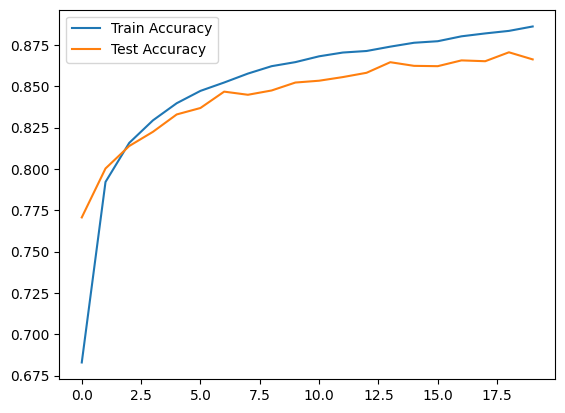

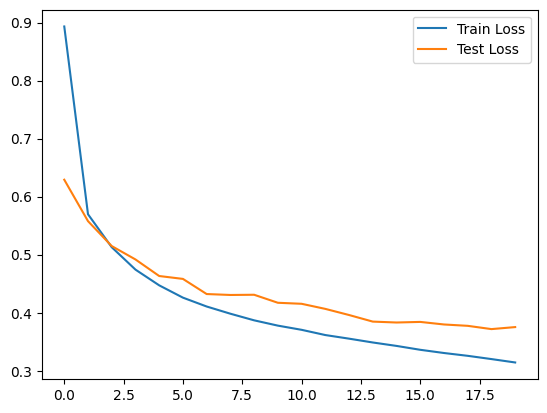

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

8. Вивести класифікаційний звіт.

In [10]:
import numpy as np
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.76      0.81      0.79      1000
           3       0.85      0.89      0.87      1000
           4       0.79      0.80      0.79      1000
           5       0.96      0.93      0.95      1000
           6       0.71      0.64      0.67      1000
           7       0.93      0.94      0.93      1000
           8       0.93      0.98      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



9. Результати розпізнавання із прогнозованим і справжнім класом

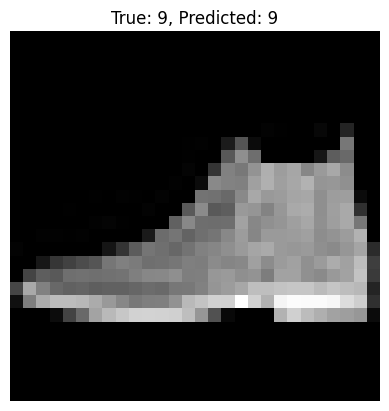

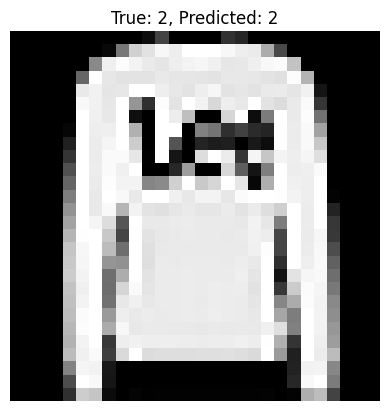

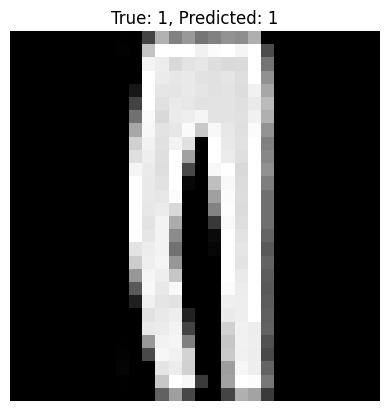

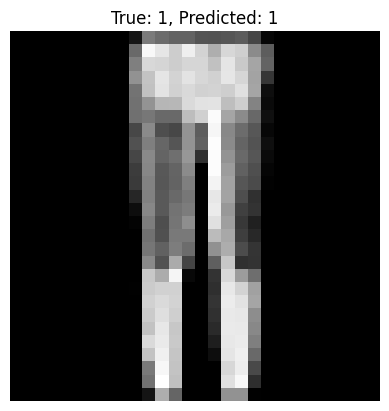

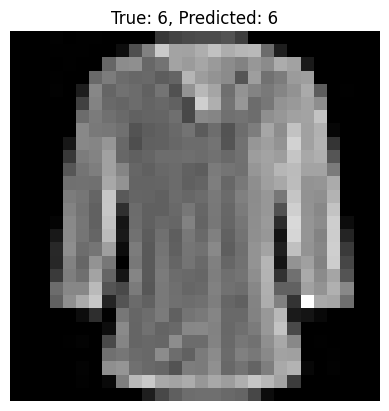

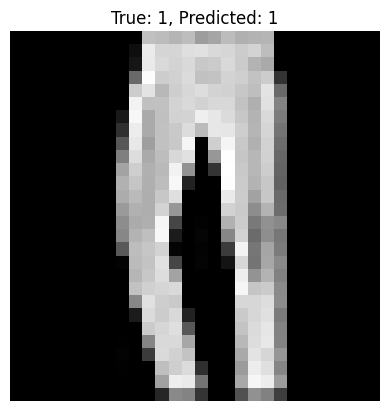

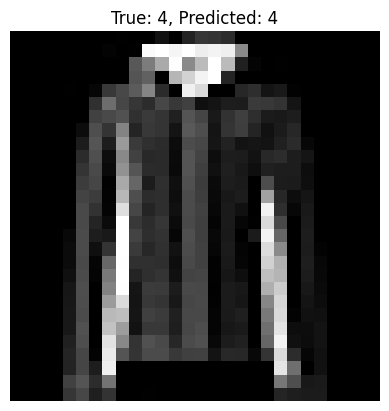

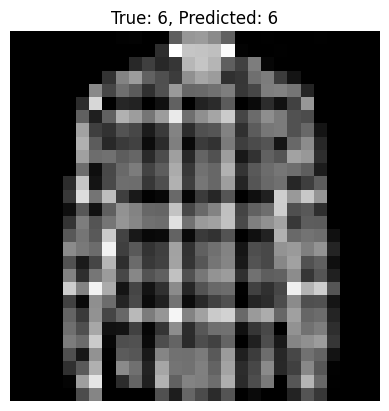

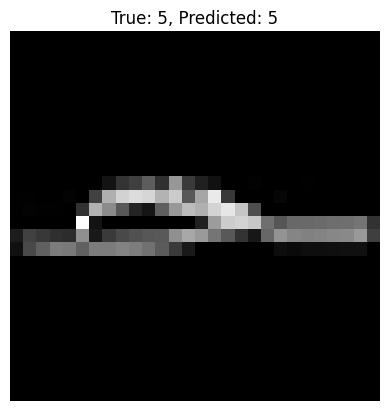

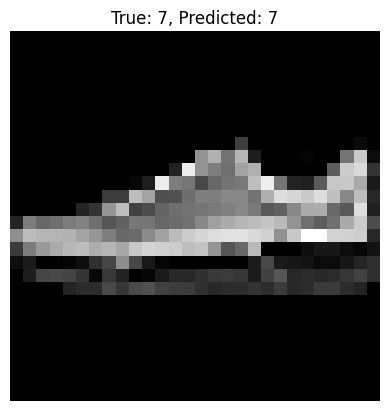

In [11]:
for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
    plt.show()

Завдання 2
Побудувати нейронну мережу, аналогічну завданню 1 для датасета fashion mnist
Використати Keras Tuner підбору гіперпараметрів моделі.

In [13]:
!pip install keras-tuner --upgrade

from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 5 Complete [00h 02m 50s]
val_accuracy: 0.8458999991416931

Best val_accuracy So Far: 0.8483999967575073
Total elapsed time: 00h 12m 54s


In [14]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 448)                 │         351,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           4,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,170 (1.36 MB)

 Trainable params: 356,170 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Порівняти результати завдання 1 і 2 (точність і функцію втрат).

In [18]:
# Завдання 1 - Побудова та оцінка моделі
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Оцінка моделі
loss_task1, accuracy_task1 = model.evaluate(X_test, y_test)
print(f"Завдання 1 - Точність: {accuracy_task1}, Втрата: {loss_task1}")

# Завдання 2 - Побудова моделі з Keras Tuner
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Налаштування RandomSearch
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Виведення найкращої моделі з Keras Tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Оцінка моделі з Keras Tuner
loss_task2, accuracy_task2 = best_model.evaluate(X_test, y_test)
print(f"Завдання 2 - Точність: {accuracy_task2}, Втрата: {loss_task2}")

# Порівняння результатів
if accuracy_task2 > accuracy_task1:
    print("Модель із завдання 2 має кращу точність.")
else:
    print("Модель із завдання 1 має кращу точність.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5622 - loss: 1.5241 - val_accuracy: 0.7383 - val_loss: 0.7326
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7559 - loss: 0.6801 - val_accuracy: 0.7746 - val_loss: 0.6194
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7871 - loss: 0.5929 - val_accuracy: 0.7916 - val_loss: 0.5702
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.8062 - loss: 0.5433 - val_accuracy: 0.8016 - val_loss: 0.5457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8178 - loss: 0.5128 - val_accuracy: 0.8104 - val_loss: 0.5211
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8295 - loss: 0.4817 - val_accuracy: 0.8209 - val_loss: 0.5018
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8328 - loss: 0.4770 - val_accuracy: 0.8263 - val_loss: 0.4886
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.4

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8540 - loss: 0.4165
Завдання 2 - Точність: 0.8483999967575073, Втрата: 0.4234691858291626
Модель із завдання 2 має кращу точність.


Написати висновки.

Висновок:

1. Базова модель надала результат достатньої точності, але вдосконали її можна складнішими конфігураціями.
2. За допомогою Keras Tuner було автоматично підібрано оптимальні параметри для покращення точності та функції втрат моделі.
